In [1]:
## Imports
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
from cycler import cycler
import os
import numpy as np

file='runComparison.csv'

In [2]:
# # Beryllium
TotalEnergy = -1.4446201118081863e+01
ExchangeEnergy = -2.2903921833555341e+00
CorrelationEnergy = -2.2343205529440757e-01
BandEnergy = -8.1232305760491457e+00
KineticEnergy =  1.4309060170370618e+01
ElectrostaticEnergy = -8.1232305760491457e+00
HartreeEnergy = 7.115165052  

# resultsDir='/Users/nathanvaughn/Documents/synchronizedDataFiles/compareSingularitySubtractionBeryllium/'
resultsDir='/Users/nathanvaughn/Documents/synchronizedDataFiles/pRefinement/'
df = pd.read_csv(resultsDir+file, header=0)

In [3]:
## Fill error arrays

df['absBandEnergyError'] = abs( df['BandEnergy'] - BandEnergy)
df['absExchangeEnergyError'] = abs( df['ExchangeEnergy'] - ExchangeEnergy)
try: 
    df['absHartreeEnergyError'] = abs( df['HartreeEnergy'] - HartreeEnergy)
except Exception as e:
    print(e, ' not present.')
df['absCorrelationEnergyError'] = abs( df['CorrelationEnergy'] - CorrelationEnergy)
df['absTotalEnergyError'] = abs( df['TotalEnergy'] - TotalEnergy)
df['absKineticEnergyError'] = abs( df['KineticEnergy'] - KineticEnergy)
try: 
    df['absElectrostaticEnergyError'] = abs( df['ElectrostaticEnergy'] - ElectrostaticEnergy)
except Exception as e:
    print(e, ' not present.')
    
df['BandEnergyError'] = ( df['BandEnergy'] - BandEnergy)
df['ExchangeEnergyError'] = ( df['ExchangeEnergy'] - ExchangeEnergy)
try: 
    df['HartreeEnergyError'] = ( df['HartreeEnergy'] - HartreeEnergy)
except Exception as e:
    print(e, ' not present.')
df['CorrelationEnergyError'] = ( df['CorrelationEnergy'] - CorrelationEnergy)
df['TotalEnergyError'] = ( df['TotalEnergy'] - TotalEnergy)
df['KineticEnergyError'] = ( df['KineticEnergy'] - KineticEnergy)
try: 
    df['ElectrostaticEnergyError'] = ( df['ElectrostaticEnergy'] - ElectrostaticEnergy)
except Exception as e:
    print(e, ' not present.')

'ElectrostaticEnergy'  not present.
'ElectrostaticEnergy'  not present.


In [26]:
## Plotting functions

def AversusB(df,A,B,save=False):
    fig, ax = plt.subplots(figsize=(8,6))
    fig.suptitle('%s versus %s' %(A,B))
    df.plot(x=B, y=A, style='o',ax=ax)

    dftfeEnergy = -1.1376237062839634e+00
    NWchemEnergy = -1.1372499
    plt.axhline(y=dftfeEnergy,color='r')
    plt.axhline(y=NWchemEnergy,color='g')
##    plt.plot(dftfeEnergy*np.ones(100),'r-')
##    plt.plot(NWchemEnergy*np.ones(100),'g-')
    if save == True:
        saveID = A+'Vs'+B
        plt.savefig(plotsDir+saveID+'.pdf', bbox_inches='tight',format='pdf')
    plt.show()

def AversusBcolorbyC(df,A,B,C,save=False):
    fig, ax = plt.subplots(figsize=(8,6))
    fig.suptitle('%s versus %s colored by %s' %(A,B,C))
    grouped = df.groupby(C)
    for name,group in grouped:
##        group.plot(x=B, y=A, style='o', ax=ax, label='%s = %.2f'%(C,name))
        group.plot(x=B, y=A, style='o', ax=ax, label='%s = %s'%(C,name))
    plt.legend(loc = 'best')

    if save == True:
        saveID = A+'Vs'+B+'ColoredBy'+C
        plt.savefig(plotsDir+saveID+'.pdf', bbox_inches='tight',format='pdf')
    plt.show()

def logAversusBcolorbyC(df,A,B,C,save=False):
    fig, ax = plt.subplots(figsize=(8,6))
    fig.suptitle('Log %s versus %s colored by %s' %(A,B,C))
    grouped = df.groupby(C)
    for name,group in grouped:
#         group['logA'] = np.log10(np.abs(group[A]))
        group.plot(x=B, y=A, logy=True, style='o', ax=ax, label='%s = %.2f'%(C,name))
##        group.plot(x=B, y='logA', style='o', ax=ax, label='%s = %s'%(C,name))
    plt.legend(loc = 'best')
    plt.xlabel(B)
    plt.ylabel(A)
#     plt.ylim([1e-3,1e-2])
    plt.grid()

    if save == True:
        saveID = 'log'+A+'Vs'+B+'ColoredBy'+C
        plt.savefig(plotsDir+saveID+'.pdf', bbox_inches='tight',format='pdf')
    plt.show()
    
def logAversusB(df,A,B,save=False):
    fig, ax = plt.subplots(figsize=(8,6))
    fig.suptitle('Log %s versus %s' %(A,B))
    df.plot(x=B, y="absTotalEnergyError", logy=True, style='o', ax=ax, label="Total Energy")
    df.plot(x=B, y="absBandEnergyError", logy=True, style='o', ax=ax, label="Band Energy")
    df.plot(x=B, y="absHartreeEnergyError", logy=True, style='o', ax=ax, label="Hartree Energy")
    plt.legend()
    plt.xlabel(B)
    plt.ylabel(A)
#     plt.ylim([1e-3,1e-2])
    plt.grid()

    if save == True:
        saveID = 'log'+A+'Vs'+B+'ColoredBy'+C
        plt.savefig(plotsDir+saveID+'.pdf', bbox_inches='tight',format='pdf')
    plt.show()

def logAversusLogBcolorbyC(df,A,B,C,save=False):
    fig, ax = plt.subplots(figsize=(8,6))
    fig.suptitle('%s versus %s colored by %s' %(A,B,C))
    grouped = df.groupby(C)
    for name,group in grouped:
##        group['logA'] = np.log10(np.abs(group[A]))
##        group['logB'] = np.log10(np.abs(group[B]))
        if isinstance(name,str):
##            group.plot(x='logB', y='logA', style='o', ax=ax, label='%s = %s'%(C,name))
            group.plot(x=B, y=A, style='o', ax=ax, loglog=True,label='%s = %s'%(C,name))
        elif isinstance(name,float):
            group.plot(x=B, y=A, style='o', ax=ax, loglog=True,label='%s = %f'%(C,name))
        elif isinstance(name,int):
            group.plot(x=B, y=A, style='o', ax=ax, loglog=True,label='%s = %i'%(C,name))
        
    plt.legend(loc = 'best')
    plt.xlabel(B)
    plt.ylabel(A)
#     plt.xlim([3e5,2e6])
#     plt.ylim([5e-5,1e-2])
    plt.grid()
    
    if save == True:
        saveID = 'log'+A+'VsLog'+B+'ColoredBy'+C
        plt.savefig(plotsDir+saveID+'.pdf', bbox_inches='tight',format='pdf')
    plt.show()

def loglogEversusNcolorbyOrder(df,A,B,C,title=None,save=False):
    fig, ax = plt.subplots(figsize=(8,6))
##    fig.suptitle('Log %s versus Log %s colored by %s' %(A,B,C))
    if title==None:
        fig.suptitle('Ground State Energy Errors: Clenshaw-Curtis vs. Midpoint')
    else:
        fig.suptitle(title)
    
##    fig.suptitle('Ground State Energy Errors: Levine-Wilkins-1 refinement')
    grouped = df.groupby(C)
    for name,group in grouped:
##        group['logA'] = np.log10(np.abs(group[A]))
##        group['logB'] = np.log10(np.abs(group[B]))
        group['absA'] = np.abs(group[A])
        group['absB'] = np.abs(group[B])
    
        if isinstance(name,str):
##            group.plot(x='logB', y='logA', style='o', ax=ax, label='%s = %s'%(C,name))
            group.plot(x=B, y=A, style='o', ax=ax, loglog=True,label='%s = %s'%(C,name))
        elif isinstance(name,float):
            group.plot(x='absB', y='absA', style='o', loglog=True, ax=ax, label='%s = %f'%(C,name))
        elif isinstance(name,int):
            if name==0:
                group.plot(x='absB', y='absA', style='o', loglog=True, ax=ax, label='Midpoint')
            else:
               group.plot(x='absB', y='absA', style='o', loglog=True, ax=ax, label='CC %s %i'%(C,name))
        
    plt.legend(loc = 'best')
    plt.xlabel('Number of Cells')
    plt.ylabel('Energy Error (Hartree)')
##    plt.yticks([1e-6,1e-5,1e-4,1e-3,1e-2],['1e-6','1e-5','1e-4','1e-3','1e-2'])
##    plt.xticks([2e4, 1e5,2e5, 3e6],['2e4', '1e5','2e5', '3e6'])

    if save != False:
##        saveID = A+'Vs'+B+'ColoredBy'+C
        saveID = save
        plt.savefig(plotsDir+saveID+'.pdf', bbox_inches='tight',format='pdf')
    plt.show()

def logAandBversusLogCcolorbyD(df,A,B,C,D,save=False):

    ## EXAMPLE ##
    '''
    logAandBversusLogCcolorbyD(df,'energyErrorGS','energyErrorGS_analyticPsi','numberOfGridpoints','divideCriterion')
    '''
    fig, ax = plt.subplots(figsize=(8,6))
    fig.suptitle('Log %s and Log %s versus Log %s colored by %s' %(A,B,C,D))
##    fig.suptitle('Ground State Energy Errors: epsilon = 1.0*volume**(1/3)')
    grouped = df.groupby(D)
    counter=0
    for name,group in grouped:
        group['logA'] = np.log10(np.abs(group[A]))
        group['logB'] = np.log10(np.abs(group[B]))
        group['logC'] = np.log10(np.abs(group[C]))
        group['absA'] = np.abs(group[A])
        group['absB'] = np.abs(group[B])
        if counter == 0:
            sty1 = 'bo'
            sty2 = 'b^'
        elif counter == 1:
            sty1 = 'go'
            sty2 = 'g^'
        elif counter == 2:
            sty1 = 'ro'
            sty2 = 'r^'
        elif counter == 3:
            sty1 = 'mo'
            sty2 = 'm^'
        if isinstance(name,str):
##            group.plot(x='logC', y='logA', style=sty1, ax=ax, label='%s: %s = %s'%(A,D,name))
##            group.plot(x='logC', y='logB', style=sty2, ax=ax, label='%s: %s = %s'%(B,D,name))
##            group.plot(x='logC', y='logA', style=sty1, ax=ax, label='GreenIteration: %s'%(name))
##            group.plot(x='logC', y='logB', style=sty2, ax=ax, label='AnalyticPsi:      %s'%(name))
            group.plot(x=C, y='absA', style=sty1, ax=ax, loglog=True,label='GreenIteration: %s'%(name))
            group.plot(x=C, y='absB', style=sty2, ax=ax, loglog=True, label='AnalyticPsi:      %s'%(name))
        elif isinstance(name,float):
            group.plot(x='logC', y='logA', style=sty1, ax=ax, label='%s: %s = %f'%(A,D,name))
            group.plot(x='logC', y='logB', style=sty2, ax=ax, label='%s: %s = %f'%(B,D,name))
        elif isinstance(name,int):
            group.plot(x='logC', y='logA', style=sty1, ax=ax, label='%s: %s = %i'%(A,D,name))
            group.plot(x='logC', y='logB', style=sty2, ax=ax, label='%s: %s = %i'%(B,D,name))
        counter+=1
        
    plt.legend(loc = 'best')
##    plt.xlabel('number of gridpoints')
##    plt.ylabel('energy error (H)')
##    plt.yticks([1e-4,5e-4,1e-3,5e-3,1e-2],['1e-4','5e-4','1e-3','5e-3','1e-2'])
##    plt.xticks([5e4, 1e5,2e5, 5e5],['5e4', '1e5','2e5', '5e5'])

    if save == True:
        saveID = 'log'+A+'andLog'+B+'VsLog'+C+'ColoredBy'+C
        plt.savefig(plotsDir+saveID+'.pdf', bbox_inches='tight',format='pdf')
    plt.show()

def energyErrors():
    fig, ax = plt.subplots(figsize=(8,6))
#    fig.suptitle("Oxygen Atom: Energy Errors")
#     fig.suptitle("Beryllium Atom: Energy Errors")
##    fig.suptitle("Hydrogen Molecule: Energy Errors")
#     df.plot(x='numberOfPoints', y='BandEnergyError', style='o', ax=ax, loglog=True)
#     df.plot(x='numberOfPoints', y='ExchangeEnergyError', style='o', ax=ax, loglog=True)
#     df.plot(x='numberOfPoints', y='CorrelationEnergyError', style='o', ax=ax, loglog=True)
#     df.plot(x='numberOfPoints', y='ElectrostaticEnergyError', style='o', ax=ax, loglog=True)
    df.plot(x='numberOfPoints', y='TotalEnergyError', style='o', ax=ax, loglog=True)
  
    plt.legend(loc = 'best')
    plt.xlabel('Number of Gridpoints')
    plt.ylabel('Energy Error (Hartree)')
    plt.title('Oxygen Atom Energy Errors')

    plt.show()
    
    
def energyErrors_splitByGradientHandling(order=None):
    if order==None:
        df_gradient = df.loc[df['gradientFree']==False]
        df_free = df.loc[df['gradientFree']==True]

    else:
        df5 = df.loc[df['order']==5]
        df_gradient = df5.loc[df5['gradientFree']==False]
        df_free = df5.loc[df5['gradientFree']==True]
    
    print('df_gradient: ', df_gradient.head(5))
    print('df_free: ', df_free.head(5))
    fig, ax1 = plt.subplots(figsize=(8,6))
    fig, ax2 = plt.subplots(figsize=(8,6))
#    fig.suptitle("Oxygen Atom: Energy Errors")
#     fig.suptitle("Beryllium Atom: Energy Errors")
##    fig.suptitle("Hydrogen Molecule: Energy Errors")
    df_gradient.plot(x='numberOfPoints', y='BandEnergyError', style='o', ax=ax1, loglog=True)
    df_gradient.plot(x='numberOfPoints', y='KineticEnergyError', style='o', ax=ax1, loglog=True)
    df_gradient.plot(x='numberOfPoints', y='ExchangeEnergyError', style='o', ax=ax1, loglog=True)
    df_gradient.plot(x='numberOfPoints', y='CorrelationEnergyError', style='o', ax=ax1, loglog=True)
    df_gradient.plot(x='numberOfPoints', y='ElectrostaticEnergyError', style='o', ax=ax1, loglog=True)
    df_gradient.plot(x='numberOfPoints', y='TotalEnergyError', style='o', ax=ax1, loglog=True)
    
    
    df_free.plot(x='numberOfPoints', y='BandEnergyError', style='o', ax=ax2, loglog=True)
    df_free.plot(x='numberOfPoints', y='KineticEnergyError', style='o', ax=ax2, loglog=True)
    df_free.plot(x='numberOfPoints', y='ExchangeEnergyError', style='o', ax=ax2, loglog=True)
    df_free.plot(x='numberOfPoints', y='CorrelationEnergyError', style='o', ax=ax2, loglog=True)
    df_free.plot(x='numberOfPoints', y='ElectrostaticEnergyError', style='o', ax=ax2, loglog=True)
    df_free.plot(x='numberOfPoints', y='TotalEnergyError', style='o', ax=ax2, loglog=True)
  
    ax1.legend(loc = 'best')
    ax1.set_xlabel('Number of Gridpoints')
    ax1.set_ylabel('Energy Error (Hartree)')
    ax2.legend(loc = 'best')
    ax2.set_xlabel('Number of Gridpoints')
    ax2.set_ylabel('Energy Error (Hartree)')
    
    ax1.set_title('Beryllium Errors: With Gradients')
    ax2.set_title('Beryllium Errors: Gradient-Free')

    plt.show()
    
def totalEnergyErrors_splitByGradientHandling():
    
    anderson = False
    if anderson==True:
        resultsDir = '/Users/nathanvaughn/Desktop/ClenshawCurtisGreenIterations/oxygen_with_anderson/'
        df_anderson = pd.read_csv(resultsDir+file, header=0)
        df_anderson['TotalEnergyError'] = abs( df_anderson['TotalEnergy'] - TotalEnergy)
    
    df6 = df.loc[df['order']==6]
    df5 = df.loc[df['order']==5]
    df4 = df.loc[df['order']==4]
#     df4_gradient = df4.loc[df4['gradientFree']==False]
#     df4_free = df4.loc[df4['gradientFree']==True]
#     
#     df6_gradient = df6.loc[df6['gradientFree']==False]
#     df6_free = df6.loc[df6['gradientFree']==True]
    
    
    df5_gradient = df5.loc[df5['gradientFree']==False]
    df5_free = df5.loc[df5['gradientFree']==True]
    
    
    fig, ax1 = plt.subplots(figsize=(8,6))
#     fig, ax2 = plt.subplots(figsize=(8,6))
#    fig.suptitle("Oxygen Atom: Energy Errors")
#     fig.suptitle("Beryllium Atom: Energy Errors")
##    fig.suptitle("Hydrogen Molecule: Energy Errors")

#     df4_gradient.plot(x='numberOfPoints', y='TotalEnergyError', style='ro', ax=ax1, loglog=True, label='Order 4')
#     df4_free.plot(x='numberOfPoints', y='TotalEnergyError', style='rx', ax=ax1, loglog=True, label='Order 4, Gradient Free')
    
    df5_gradient.plot(x='numberOfPoints', y='TotalEnergyError', style='bo', ax=ax1, loglog=True, label='Order 5')
    if anderson==True:
        df_anderson.plot(x='numberOfPoints', y='TotalEnergyError', style='go', ax=ax1, loglog=True, label='Order 5, Anderson Mixing')
    df5_free.plot(x='numberOfPoints', y='TotalEnergyError', style='bx', ax=ax1, loglog=True, label='Order 5, Gradient Free')
    
#     df6_gradient.plot(x='numberOfPoints', y='TotalEnergyError', style='go', ax=ax1, loglog=True, label='Order 6')
#     df6_free.plot(x='numberOfPoints', y='TotalEnergyError', style='gx', ax=ax1, loglog=True, label='Order 6, Gradient Free')
    
    

  
    ax1.legend(loc = 'best')
    ax1.set_xlabel('Number of Gridpoints')
    ax1.set_ylabel('Energy Error (Hartree)')
    ax1.set_title('Oxygen Atom: Total Energy Error')
    
# #     df4_gradient.plot(x='numberOfCells', y='TotalEnergyError', style='ro', ax=ax2, loglog=True, label='Order 4')
# #     df4_free.plot(x='numberOfCells', y='TotalEnergyError', style='rx', ax=ax2, loglog=True, label='Order 4, Gradient Free')
#     df5_gradient.plot(x='numberOfCells', y='TotalEnergyError', style='bo', ax=ax2, loglog=True, label='Order 5')
#     df5_free.plot(x='numberOfCells', y='TotalEnergyError', style='bx', ax=ax2, loglog=True, label='Order 5, Gradient Free')
# #     df6_gradient.plot(x='numberOfCells', y='TotalEnergyError', style='go', ax=ax2, loglog=True, label='Order 6')
# #     df6_free.plot(x='numberOfCells', y='TotalEnergyError', style='gx', ax=ax2, loglog=True, label='Order 6, Gradient Free')
# 
#     ax2.legend(loc = 'best')
#     ax2.set_xlabel('Number of Cells')
#     ax2.set_ylabel('Energy Error (Hartree)')
#     ax2.set_title('Oxygen Atom: Total Energy Error') 
    plt.show()
    
    
def extrapolate_Vext_regularization(df,X,Y,degree,plot=True):
    q=np.polyfit(df[X],df[Y],degree)
#     print(q)
    p = np.poly1d(q)
    
    print(p)
    
    print('Extrapolated value to epsilon = 0: ', p(0.0))
    if Y=='TotalEnergy':
        print('Error in extrapolated value:       ', p(0.0)-TotalEnergy)
    elif Y=='BandEnergy':
        print('Error in extrapolated value:       ', p(0.0)-BandEnergy)
    elif Y=='HartreeEnergy':
        print('Error in extrapolated value:       ', p(0.0)-HartreeEnergy)
    
    
    if plot==True:
        fig, ax = plt.subplots(figsize=(8,6))
        fig.suptitle('%s versus %s with Extrapolated Value' %(Y,X))
        df.plot(x=X, y=Y, logy=False, style='o', ax=ax)
        plt.legend(loc = 'best')
        plt.xlabel(X)
        plt.ylabel(Y)
        plt.grid()
        
        plt.plot(0.0, p(0.0), 'ro')
        if Y=='TotalEnergy': plt.axhline(y=TotalEnergy,color='k')
        if Y=='BandEnergy': plt.axhline(y=BandEnergy,color='k')
        if Y=='HartreeEnergy': plt.axhline(y=HartreeEnergy,color='k')
    
        plt.show()
    
    return
 


<IPython.core.display.Javascript object>


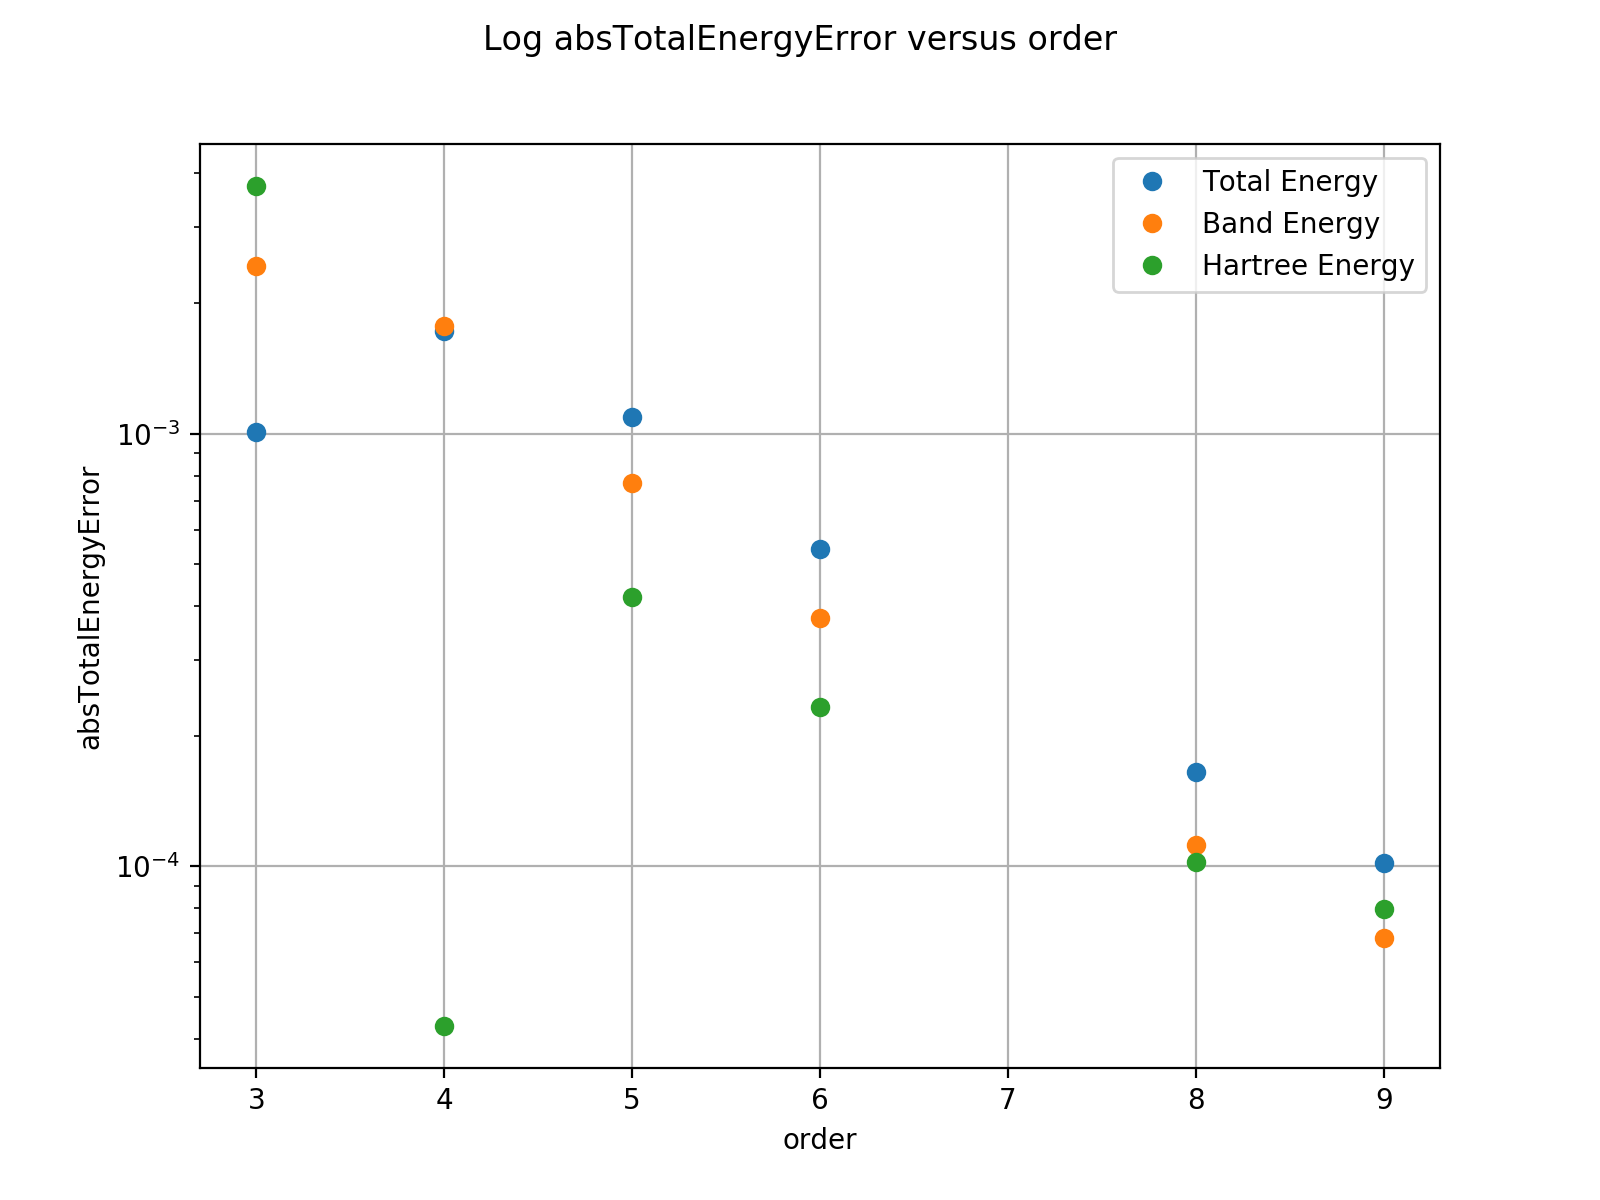

In [27]:
# logAversusLogBcolorbyC(df,'absTotalEnergyError', 'numberOfPoints', 'GreenSingSubtracted')
df = df.loc[df['divideParameter1']==500] 
logAversusB(df,'absTotalEnergyError', 'order')
# logAversusLogBcolorbyC(df,'absBandEnergyError', 'order', 'order')
# AversusBcolorbyC(df,'BandEnergy', 'theta', 'treecodeOrder')
# AversusBcolorbyC(df,'HartreeEnergy', 'theta', 'treecodeOrder')
# AversusBcolorbyC(df,'ExchangeEnergy', 'theta', 'treecodeOrder')